# 환경설정

In [78]:
import requests
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re

from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import urllib
import time

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc

In [3]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 불러오기

In [4]:
text1 = pd.read_csv('', encoding='utf-8')
text2 = pd.read_csv('', encoding='cp949')

In [11]:
str_text1 = str(text1)
str_text2 = str(text2)

In [14]:
stopwords = set(STOPWORDS)

# 워드클라우드

In [15]:
wc = WordCloud(background_color='white', max_words=2000, font_path=font, stopwords = stopwords)
wc = wc.generate(str_text1)
wc.words_

{'2012년': 0.5,
 'SF': 0.5,
 'columns': 0.5,
 'rows': 0.5,
 '공상과학': 0.5,
 '공포': 0.5,
 '관성': 0.5,
 '괴혈병': 0.5,
 '구심력': 0.5,
 '구조': 0.5,
 '국문키워드': 0.5,
 '기능성': 0.5,
 '내복': 0.5,
 '동결건조': 0.5,
 '로봇공학': 0.5,
 '말라리아': 0.5,
 '모기': 0.5,
 '모세관': 0.5,
 '무인기': 0.5,
 '밀도': 0.5,
 '발열': 0.5,
 '비중': 0.5,
 '섬유': 0.5,
 '소금': 0.5,
 '실험': 0.5,
 '아시모프': 1.0,
 '아이작': 0.5,
 '우주식품': 0.5,
 '우주음식': 0.5,
 '원심력': 0.5,
 '윷놀이': 0.5,
 '이너웨어': 0.5,
 '일본뇌염': 0.5,
 '재난': 0.5,
 '전동': 0.5,
 '전동기': 0.5,
 '정기공기층': 0.5,
 '제임스': 0.5,
 '캡틴': 0.5,
 '태양전지': 0.5,
 '하와이': 0.5,
 '항공우주': 0.5,
 '효과': 0.5,
 '흑룡': 0.5}

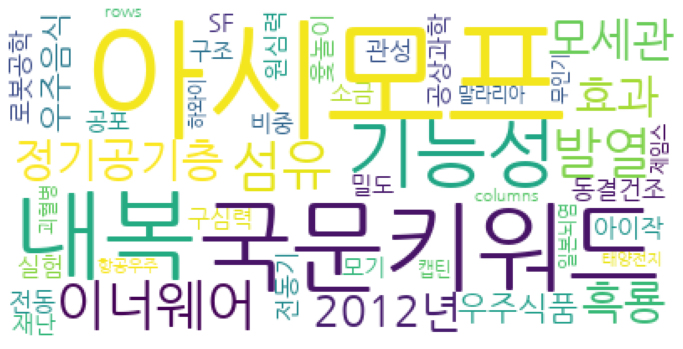

In [16]:
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [17]:
wc2 = WordCloud(background_color='white', max_words=2000, font_path=font, stopwords=stopwords)
wc2 = wc.generate(str_text2)
wc2.words_

{'Equus': 0.5,
 'Fi': 0.5,
 'Haifu': 0.5,
 'Kimjang': 0.5,
 'Knife': 0.5,
 'LED': 0.5,
 'Li': 0.5,
 'T1AM': 0.5,
 'activation': 0.5,
 'adenosine': 0.5,
 'alien': 0.5,
 'care': 1.0,
 'columns': 0.5,
 'common': 0.5,
 'communication': 0.5,
 'cycle': 0.5,
 'electric': 0.5,
 'electromagnetic': 0.5,
 'estrogen': 0.5,
 'fermentation': 0.5,
 'filter': 0.5,
 'flush': 0.5,
 'frequency': 0.5,
 'goldilocks': 0.5,
 'health': 0.5,
 'hibernation': 0.5,
 'home': 0.5,
 'horse': 0.5,
 'hot': 1.0,
 'internet': 0.5,
 'kepler': 0.5,
 'kimchi': 0.5,
 'least': 0.5,
 'light': 1.0,
 'mat': 1.0,
 'multiple': 0.5,
 'pen': 0.5,
 'planet': 0.5,
 'przewalskii': 0.5,
 'purification': 0.5,
 'purifier': 0.5,
 'register': 0.5,
 'rows': 0.5,
 'sexagenary': 0.5,
 'steroid': 0.5,
 'tap': 0.5,
 'visible': 0.5,
 'water': 1.0,
 'wave': 0.5,
 'wireless': 0.5}

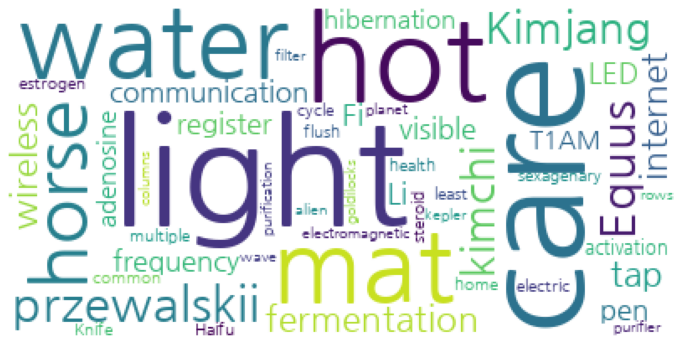

In [18]:
plt.figure(figsize=(12, 12))
plt.imshow(wc2)
plt.axis('off')
plt.show()

# 크롤링 및 워드클라우드

In [32]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [33]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[]

In [175]:
title = []
start_num = 1
query = input('검색 키워드를 입력하세요 : ')

while start_num <= 5:
  url = f'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={query}&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=32&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={start_num}'
  reponse = requests.get(url)
  soup = bs(reponse.text, 'html.parser')
  title_tags = soup.select('.news_tit')
  start_num += 1
  print(str(start_num)+"번째 완료")
  time.sleep(2)
  for tag in title_tags:
    title.append(tag.text)

검색 키워드를 입력하세요 : 토스
2번째 완료
3번째 완료
4번째 완료
5번째 완료
6번째 완료


In [176]:
title

['토스도 은행도…금융 고래들 앞다퉈 뛰어드는 이 시장 [긱스]',
 '호주 침몰시킨 허수봉 "토스 올려준 한선수 선배 덕분"',
 '토스뱅크, 1000억원 규모 유상증자…총 1조500억원 확보',
 "알뜰폰 '금융 메기' 통할까…KB국민 이어 토스까지",
 '토스 이승건이 여덟번 망하고 대충 만든 이야기 [쫌아는기자들]',
 '토스뱅크, 1000억 유상증자 결의…출범 후 8000억 실탄 추가',
 '[포토]토스하는 한선수',
 "[사진]한선수, '호주 홀리는 토스'",
 '토스, 주니어 개발자 공채…9개 부문에서 최대 80명',
 '국민은행 이어 토스까지...금융사 알뜰폰 포식자 되나',
 '호주 침몰시킨 허수봉 "토스 올려준 한선수 선배 덕분"',
 '토스뱅크, 1000억원 규모 유상증자…총 1조500억원 확보',
 '알뜰폰 가입자 1300만 시대 코앞… KB 이어 토스도 진출',
 '토스 이승건이 여덟번 망하고 대충 만든 이야기 [쫌아는기자들]',
 '토스뱅크, 1000억 유상증자 결의…출범 후 8000억 실탄 추가',
 '[포토]토스하는 한선수',
 "[사진]한선수, '호주 홀리는 토스'",
 '토스, 3년차 이하 개발자 최대 80명 공개채용',
 "[사진]한선수, '감탄 나오는 한 손 토스'",
 '토스까지 나섰다…알뜰폰 사업 힘주는 금융사들',
 '토스뱅크, 1000억원 규모 유상증자…총 1조500억원 확보',
 '알뜰폰 가입자 1300만 시대 코앞… KB 이어 토스도 진출',
 '토스 이승건이 여덟번 망하고 대충 만든 이야기 [쫌아는기자들]',
 '토스뱅크, 1000억 유상증자 결의…출범 후 8000억 실탄 추가',
 '[포토]토스하는 한선수',
 "[사진]한선수, '호주 홀리는 토스'",
 '토스, 3년차 이하 개발자 최대 80명 공개채용',
 "[사진]한선수, '감탄 나오는 한 손 토스'",
 '토스까지 나섰다…알뜰폰 사업 힘주는 금융사들',
 '"토스는 빛 좋은 개살구?" KB국민은행, 모바일 결집 시동...MAU 1200만 모았다',
 '알

In [177]:
len(title)

50

In [87]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 49.7 MB/s 


In [157]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [178]:
present_text = ''

for each_line in title[:10000]:
    present_text = present_text + each_line + '\n'

In [179]:
present_text

'토스도 은행도…금융 고래들 앞다퉈 뛰어드는 이 시장 [긱스]\n호주 침몰시킨 허수봉 "토스 올려준 한선수 선배 덕분"\n토스뱅크, 1000억원 규모 유상증자…총 1조500억원 확보\n알뜰폰 \'금융 메기\' 통할까…KB국민 이어 토스까지\n토스 이승건이 여덟번 망하고 대충 만든 이야기 [쫌아는기자들]\n토스뱅크, 1000억 유상증자 결의…출범 후 8000억 실탄 추가\n[포토]토스하는 한선수\n[사진]한선수, \'호주 홀리는 토스\'\n토스, 주니어 개발자 공채…9개 부문에서 최대 80명\n국민은행 이어 토스까지...금융사 알뜰폰 포식자 되나\n호주 침몰시킨 허수봉 "토스 올려준 한선수 선배 덕분"\n토스뱅크, 1000억원 규모 유상증자…총 1조500억원 확보\n알뜰폰 가입자 1300만 시대 코앞… KB 이어 토스도 진출\n토스 이승건이 여덟번 망하고 대충 만든 이야기 [쫌아는기자들]\n토스뱅크, 1000억 유상증자 결의…출범 후 8000억 실탄 추가\n[포토]토스하는 한선수\n[사진]한선수, \'호주 홀리는 토스\'\n토스, 3년차 이하 개발자 최대 80명 공개채용\n[사진]한선수, \'감탄 나오는 한 손 토스\'\n토스까지 나섰다…알뜰폰 사업 힘주는 금융사들\n토스뱅크, 1000억원 규모 유상증자…총 1조500억원 확보\n알뜰폰 가입자 1300만 시대 코앞… KB 이어 토스도 진출\n토스 이승건이 여덟번 망하고 대충 만든 이야기 [쫌아는기자들]\n토스뱅크, 1000억 유상증자 결의…출범 후 8000억 실탄 추가\n[포토]토스하는 한선수\n[사진]한선수, \'호주 홀리는 토스\'\n토스, 3년차 이하 개발자 최대 80명 공개채용\n[사진]한선수, \'감탄 나오는 한 손 토스\'\n토스까지 나섰다…알뜰폰 사업 힘주는 금융사들\n"토스는 빛 좋은 개살구?" KB국민은행, 모바일 결집 시동...MAU 1200만 모았다\n알뜰폰 가입자 1300만 시대 코앞… KB 이어 토스도 진출\n토스 이승건이 여덟번 망하고 대충 만든 이야기 [쫌아는기자들]\n토스뱅크, 100

In [180]:
tokens_ko = t.morphs(present_text)
tokens_ko

['토스',
 '도',
 '은행',
 '도',
 '…',
 '금융',
 '고래',
 '들',
 '앞',
 '다퉈',
 '뛰어드는',
 '이',
 '시장',
 '[',
 '긱스',
 ']',
 '\n',
 '호주',
 '침몰',
 '시킨',
 '허수',
 '봉',
 '"',
 '토스',
 '올려준',
 '한선수',
 '선배',
 '덕분',
 '"',
 '\n',
 '토스',
 '뱅크',
 ',',
 '1000억원',
 '규모',
 '유상증자',
 '…',
 '총',
 '1조',
 '500억원',
 '확보',
 '\n',
 '알뜰폰',
 "'",
 '금융',
 '메기',
 "'",
 '통',
 '할까',
 '…',
 'KB',
 '국민',
 '이어',
 '토스',
 '까지',
 '\n',
 '토스',
 '이승건',
 '이',
 '여덟',
 '번',
 '망하고',
 '대충',
 '만든',
 '이야기',
 '[',
 '쫌',
 '아는',
 '기자',
 '들',
 ']',
 '\n',
 '토스',
 '뱅크',
 ',',
 '1000억',
 '유상증자',
 '결의',
 '…',
 '출범',
 '후',
 '8000억',
 '실탄',
 '추가',
 '\n',
 '[',
 '포토',
 ']',
 '토스',
 '하는',
 '한선수',
 '\n',
 '[',
 '사진',
 ']',
 '한선수',
 ',',
 "'",
 '호주',
 '홀리',
 '는',
 '토스',
 "'",
 '\n',
 '토스',
 ',',
 '주니어',
 '개발자',
 '공채',
 '…',
 '9',
 '개',
 '부문',
 '에서',
 '최대',
 '80',
 '명',
 '\n',
 '국민은행',
 '이어',
 '토스',
 '까지',
 '...',
 '금융',
 '사',
 '알뜰폰',
 '포식자',
 '되나',
 '\n',
 '호주',
 '침몰',
 '시킨',
 '허수',
 '봉',
 '"',
 '토스',
 '올려준',
 '한선수',
 '선배',
 '덕분',
 '"',
 '\n',
 '토스',
 '뱅크',


In [181]:
ko = nltk.Text(tokens_ko, name='토스')
print(len(ko.tokens))
print(len(set(ko.tokens)))

649
131


In [182]:
ko = nltk.Text(tokens_ko, name='토스')
ko.vocab().most_common(100)

[('토스', 50),
 ('\n', 50),
 (',', 28),
 ('[', 20),
 (']', 20),
 ("'", 20),
 ('…', 19),
 ('한선수', 16),
 ('"', 11),
 ('뱅크', 11),
 ('들', 10),
 ('알뜰폰', 9),
 ('사진', 9),
 ('이', 8),
 ('유상증자', 8),
 ('는', 8),
 ('금융', 7),
 ('호주', 7),
 ('KB', 7),
 ('까지', 6),
 ('도', 5),
 ('이어', 5),
 ('이승건', 5),
 ('여덟', 5),
 ('번', 5),
 ('망하고', 5),
 ('대충', 5),
 ('만든', 5),
 ('이야기', 5),
 ('쫌', 5),
 ('아는', 5),
 ('기자', 5),
 ('1000억', 5),
 ('결의', 5),
 ('출범', 5),
 ('후', 5),
 ('8000억', 5),
 ('실탄', 5),
 ('추가', 5),
 ('포토', 5),
 ('하는', 5),
 ('홀리', 5),
 ('개발자', 5),
 ('최대', 5),
 ('80', 5),
 ('명', 5),
 ('사', 5),
 ('국민은행', 4),
 ('...', 4),
 ('3년', 4),
 ('차', 4),
 ('이하', 4),
 ('공개', 4),
 ('채용', 4),
 ('감탄', 4),
 ('나오는', 4),
 ('한', 4),
 ('손', 4),
 ('나섰다', 4),
 ('사업', 4),
 ('힘주는', 4),
 ('1000억원', 3),
 ('규모', 3),
 ('총', 3),
 ('1조', 3),
 ('500억원', 3),
 ('확보', 3),
 ('가입자', 3),
 ('1300만', 3),
 ('시대', 3),
 ('코앞', 3),
 ('진출', 3),
 ('빛', 3),
 ('좋은', 3),
 ('개살구', 3),
 ('?"', 3),
 ('모바일', 3),
 ('결집', 3),
 ('시동', 3),
 ('MAU', 3),
 ('1200만', 3),


In [183]:
ko.similar('토스')

In [188]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지', 
                      '\n', '[', ']', "'", '…', '"', '단어', '이어', '까지', '만든', '이야기', 
                      '쫌', '아는', '기자', '나섰다', '힘주는']

In [189]:

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('토스', 50),
 ('한선수', 16),
 ('뱅크', 11),
 ('알뜰폰', 9),
 ('사진', 9),
 ('유상증자', 8),
 ('금융', 7),
 ('호주', 7),
 ('KB', 7),
 ('이승건', 5),
 ('여덟', 5),
 ('번', 5),
 ('망하고', 5),
 ('대충', 5),
 ('1000억', 5),
 ('결의', 5),
 ('출범', 5),
 ('8000억', 5),
 ('실탄', 5),
 ('추가', 5),
 ('포토', 5),
 ('홀리', 5),
 ('개발자', 5),
 ('최대', 5),
 ('80', 5),
 ('명', 5),
 ('사', 5),
 ('국민은행', 4),
 ('3년', 4),
 ('차', 4),
 ('이하', 4),
 ('공개', 4),
 ('채용', 4),
 ('감탄', 4),
 ('나오는', 4),
 ('손', 4),
 ('사업', 4),
 ('1000억원', 3),
 ('규모', 3),
 ('총', 3),
 ('1조', 3),
 ('500억원', 3),
 ('확보', 3),
 ('가입자', 3),
 ('1300만', 3),
 ('시대', 3),
 ('코앞', 3),
 ('진출', 3),
 ('빛', 3),
 ('좋은', 3)]

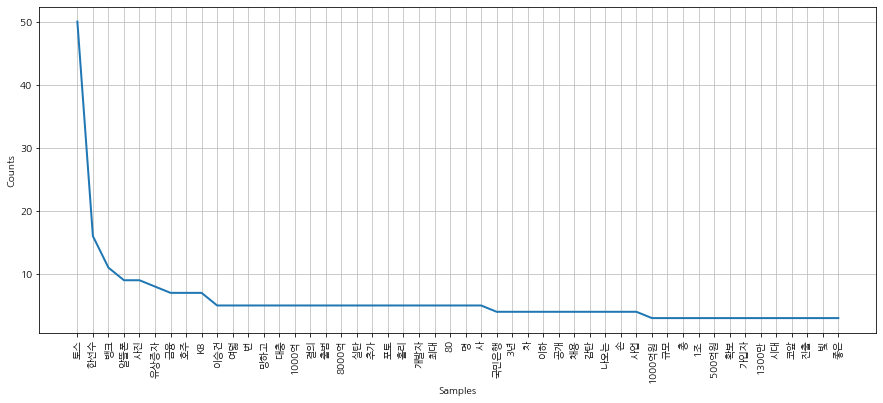

In [190]:
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

In [167]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

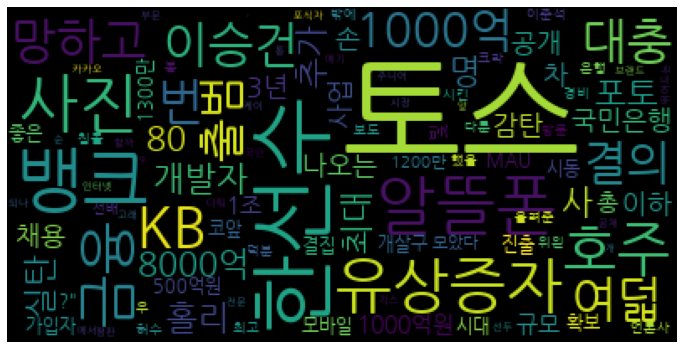

In [191]:
data = ko.vocab().most_common(200)
wc = WordCloud(background_color='black', 
               font_path=font, stopwords = stopwords).generate_from_frequencies(dict(data))
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [235]:
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/sesac/image/symbol-toss-white.png'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [236]:
data = ko.vocab().most_common(200)
wc = WordCloud(background_color='white', 
               font_path=font, stopwords = stopwords).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

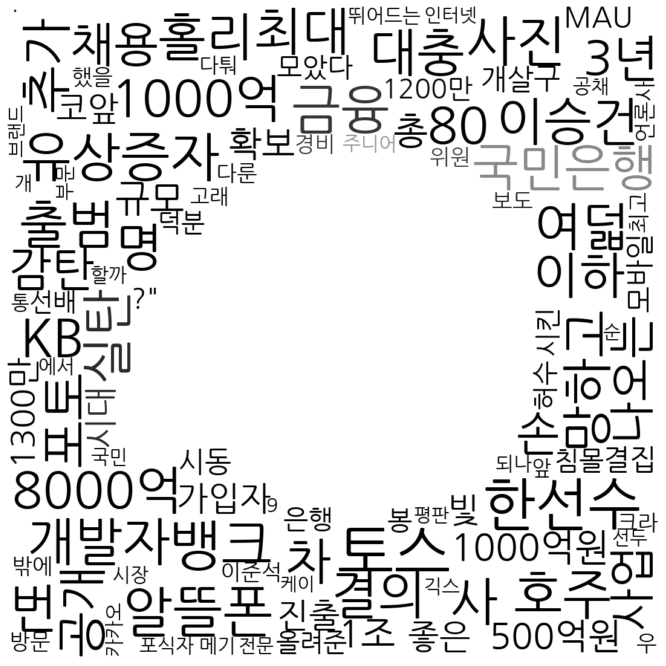

In [237]:

plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()